<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/multiple_linear_regression_scikit_learn_fish_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vipullrathod/fish-market/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/vipullrathod/fish-market/versions/1

Fish.csv


In [ ]:
import pandas as pd

fishDataSet = pd.read_csv('/root/.cache/kagglehub/datasets/vipullrathod/fish-market/versions/1/Fish.csv')
print(fishDataSet.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [ ]:
filtered = fishDataSet[fishDataSet['Species'] == "Perch"]
print(filtered)

    Species  Weight  Length1  Length2  Length3   Height   Width
72    Perch     5.9      7.5      8.4      8.8   2.1120  1.4080
73    Perch    32.0     12.5     13.7     14.7   3.5280  1.9992
74    Perch    40.0     13.8     15.0     16.0   3.8240  2.4320
75    Perch    51.5     15.0     16.2     17.2   4.5924  2.6316
76    Perch    70.0     15.7     17.4     18.5   4.5880  2.9415
77    Perch   100.0     16.2     18.0     19.2   5.2224  3.3216
78    Perch    78.0     16.8     18.7     19.4   5.1992  3.1234
79    Perch    80.0     17.2     19.0     20.2   5.6358  3.0502
80    Perch    85.0     17.8     19.6     20.8   5.1376  3.0368
81    Perch    85.0     18.2     20.0     21.0   5.0820  2.7720
82    Perch   110.0     19.0     21.0     22.5   5.6925  3.5550
83    Perch   115.0     19.0     21.0     22.5   5.9175  3.3075
84    Perch   125.0     19.0     21.0     22.5   5.6925  3.6675
85    Perch   130.0     19.3     21.3     22.8   6.3840  3.5340
86    Perch   120.0     20.0     22.0   

In [ ]:
Weight=filtered["Weight"]

In [ ]:
Weight

,Weight
72,5.9
73,32.0
74,40.0
75,51.5
76,70.0
77,100.0
78,78.0
79,80.0
80,85.0
81,85.0


In [ ]:
weightArray = filtered['Weight'].values
print(weightArray)

[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [ ]:
weightArray=weightArray.reshape(-1,1)
print(weightArray.shape)

(56, 1)


In [ ]:
weightArray

array([[   5.9],
       [  32. ],
       [  40. ],
       [  51.5],
       [  70. ],
       [ 100. ],
       [  78. ],
       [  80. ],
       [  85. ],
       [  85. ],
       [ 110. ],
       [ 115. ],
       [ 125. ],
       [ 130. ],
       [ 120. ],
       [ 120. ],
       [ 130. ],
       [ 135. ],
       [ 110. ],
       [ 130. ],
       [ 150. ],
       [ 145. ],
       [ 150. ],
       [ 170. ],
       [ 225. ],
       [ 145. ],
       [ 188. ],
       [ 180. ],
       [ 197. ],
       [ 218. ],
       [ 300. ],
       [ 260. ],
       [ 265. ],
       [ 250. ],
       [ 250. ],
       [ 300. ],
       [ 320. ],
       [ 514. ],
       [ 556. ],
       [ 840. ],
       [ 685. ],
       [ 700. ],
       [ 700. ],
       [ 690. ],
       [ 900. ],
       [ 650. ],
       [ 820. ],
       [ 850. ],
       [ 900. ],
       [1015. ],
       [ 820. ],
       [1100. ],
       [1000. ],
       [1100. ],
       [1000. ],
       [1000. ]])

In [ ]:
sizeArray = filtered[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
print(sizeArray)

[[ 7.5     8.4     8.8     2.112   1.408 ]
 [12.5    13.7    14.7     3.528   1.9992]
 [13.8    15.     16.      3.824   2.432 ]
 [15.     16.2    17.2     4.5924  2.6316]
 [15.7    17.4    18.5     4.588   2.9415]
 [16.2    18.     19.2     5.2224  3.3216]
 [16.8    18.7    19.4     5.1992  3.1234]
 [17.2    19.     20.2     5.6358  3.0502]
 [17.8    19.6    20.8     5.1376  3.0368]
 [18.2    20.     21.      5.082   2.772 ]
 [19.     21.     22.5     5.6925  3.555 ]
 [19.     21.     22.5     5.9175  3.3075]
 [19.     21.     22.5     5.6925  3.6675]
 [19.3    21.3    22.8     6.384   3.534 ]
 [20.     22.     23.5     6.11    3.4075]
 [20.     22.     23.5     5.64    3.525 ]
 [20.     22.     23.5     6.11    3.525 ]
 [20.     22.     23.5     5.875   3.525 ]
 [20.     22.     23.5     5.5225  3.995 ]
 [20.5    22.5    24.      5.856   3.624 ]
 [20.5    22.5    24.      6.792   3.624 ]
 [20.7    22.7    24.2     5.9532  3.63  ]
 [21.     23.     24.5     5.2185  3.626 ]
 [21.5    2

In [ ]:
sizeArray[0,0]

np.float64(7.5)

In [ ]:
sizeArray.shape

(56, 5)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(sizeArray,weightArray)

print("coefficient ", reg.coef_[0])
print("intercept ", reg.intercept_)

coefficient  [ -3.13022755 -38.50185035  42.91737643  65.65545803  64.90227432]
intercept  [-556.58647436]


In [ ]:
weightPredictions = reg.predict(sizeArray)

np.column_stack([sizeArray,weightArray,weightPredictions])

array([[   7.5       ,    8.4       ,    8.8       ,    2.112     ,
           1.408     ,    5.9       , -295.75908184],
       [  12.5       ,   13.7       ,   14.7       ,    3.528     ,
           1.9992    ,   32.        , -130.91915243],
       [  13.8       ,   15.        ,   16.        ,    3.824     ,
           2.432     ,   40.        ,  -81.72454445],
       [  15.        ,   16.2       ,   17.2       ,    4.5924    ,
           2.6316    ,   51.5       ,  -16.77803833],
       [  15.7       ,   17.4       ,   18.5       ,    4.588     ,
           2.9415    ,   70.        ,   10.44550211],
       [  16.2       ,   18.        ,   19.2       ,    5.2224    ,
           3.3216    ,  100.        ,   82.14261866],
       [  16.8       ,   18.7       ,   19.4       ,    5.1992    ,
           3.1234    ,   78.        ,   47.50982477],
       [  17.2       ,   19.        ,   20.2       ,    5.6358    ,
           3.0502    ,   80.        ,   92.95540627],
       [  17.8       ,  

In [ ]:
mse = mean_squared_error(weightArray, weightPredictions)

r2 = r2_score(weightArray, weightPredictions)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"R-squared (R²): {r2:.4f}")

# R2 is close to 1 to the model almost perfectly predicts the solution

Mean Squared Error (MSE): 6774.4471
R-squared (R²): 0.9429


# Changes added by Teacher




In [ ]:

one_hot = pd.get_dummies(fishDataSet['Species'], prefix='Zip',dtype=int)


# Combine the one-hot encoded columns with the original DataFrame
df = pd.concat([fishDataSet, one_hot], axis=1)

df.drop(columns=['Species'], inplace=True)

In [ ]:
df

,Weight,Length1,Length2,Length3,Height,Width,Zip_Bream,Zip_Parkki,Zip_Perch,Zip_Pike,Zip_Roach,Zip_Smelt,Zip_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [ ]:
 X = df.values

 X.shape

(159, 13)

Look at size like and make sure don't have to reshape

In [ ]:
X[0]

array([242.  ,  23.2 ,  25.4 ,  30.  ,  11.52,   4.02,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ])

In [ ]:
y = df['Weight'].values

df.drop(columns=['Weight'], inplace=True)


In [ ]:



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("coefficient ", reg.coef_)
print("intercept ", reg.intercept_)

coefficient  [ 1.00000000e+00 -6.38848458e-14  6.01539536e-14  9.17314854e-15
 -1.35898810e-14  2.72204021e-14  1.77206258e-14  5.98337273e-14
 -4.40799123e-14 -1.12115080e-13 -3.17179876e-16  1.07937947e-13
 -2.89809781e-14]
intercept  -3.410605131648481e-13


In [ ]:
y_preds = reg.predict(X_test)

mse = mean_squared_error(y_test, y_preds)

r2 = r2_score(y_test, y_preds)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0000
R-squared (R²): 1.0000


# Prove that y = MX + b is still true

Here we show that reg.predict() is the same as

$pred = reg.coef_ * X + reg.intercept_ $

In [ ]:
np.matmul(reg.coef_, X_test[0]) + reg.intercept_

np.float64(77.99999999999984)

In [ ]:
reg.predict(X_test[0].reshape(1,-1))

array([78.])

# Make Prediction and Calculate Error and R-Squared

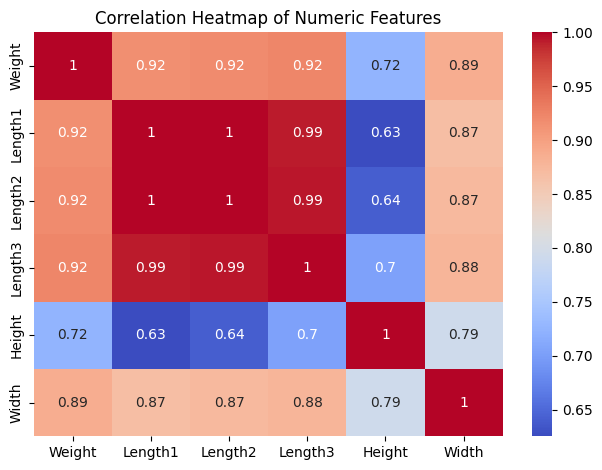

In [ ]:
import seaborn as sns

plt.figure()

numbrs=fishDataSet.loc[:, ['Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']]

corr = numbrs.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()